In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from shutil import copyfile

In [2]:
path = 'PokemonData'
newpath = 'pokemon'
os.mkdir(newpath)

classes= []

for dir_name in ['train','validation','test']: #create train validation and test folders 
    curr_path = os.path.join(newpath,dir_name)
    os.mkdir(curr_path)
    for pokemon in os.listdir(path): #create folder for each pokemon class in each folder created above
        os.mkdir(os.path.join(curr_path,pokemon))

for pokemon in os.listdir(path):
    classes.append(pokemon)
print(classes)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

In [3]:
validation_samples = 5 
test_samples = 5
total_test = 0
total_valid = 0
total_train =  0
for pokemon in os.listdir(path): #split pokemons to train validation and test
    valid_count = 0
    test_count = 0
    source_path = os.path.join(path,pokemon)
    
    for img in os.listdir(source_path):
        image_path = os.path.join(source_path,img)
        if valid_count < validation_samples:
            dest_path = os.path.join(os.path.join(newpath,'validation'),pokemon)
            copyfile(image_path, os.path.join(dest_path,img))
            valid_count += 1
            total_valid += 1
        elif test_count < test_samples:
            dest_path = os.path.join(os.path.join(newpath,'test'),pokemon)
            copyfile(image_path, os.path.join(dest_path,img))
            test_count += 1
            total_test += 1
        else:
            dest_path = os.path.join(os.path.join(newpath,'train'),pokemon)
            copyfile(image_path, os.path.join(dest_path,img))
            total_train +=1
            
print(total_valid,total_test,total_train)

750 750 5337


In [4]:
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

C:\Users\Msi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Msi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Msi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Msi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type

In [5]:
train_path = 'pokemon/train'
validation_path = 'pokemon/validation'
test_path = 'pokemon/test'

In [6]:
class_names = np.array(classes)

In [7]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
IMG_SIZE = 224

In [8]:

train_batches = image_generator.flow_from_directory(directory=train_path, target_size=(IMG_SIZE,IMG_SIZE),
    classes=classes, batch_size=10,shuffle=True)
valid_batches = image_generator.flow_from_directory(directory=validation_path, target_size=(IMG_SIZE,IMG_SIZE),
    classes=classes, batch_size=5,shuffle=True)
test_batches = image_generator.flow_from_directory(directory=test_path, target_size=(IMG_SIZE,IMG_SIZE),
    classes=classes, batch_size=5,shuffle=True)

Found 5324 images belonging to 150 classes.
Found 749 images belonging to 150 classes.
Found 747 images belonging to 150 classes.


In [9]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(10):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(class_names[label_batch[n]==1][0].title())
      plt.axis('off')

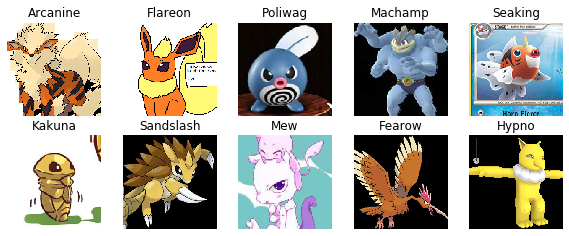

In [10]:
image_batch, label_batch = next(train_batches)
show_batch(image_batch, label_batch)

In [11]:
image_batch.shape

(10, 224, 224, 3)

In [12]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
58892288/58889256 [==============================] - 484s 8us/step


In [13]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(10, 7, 7, 512)


In [14]:
base_model.trainable = False

In [15]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(10, 512)


In [17]:
prediction_layer = tf.keras.layers.Dense(150)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(10, 150)


In [18]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [19]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               76950     
Total params: 14,791,638
Trainable params: 76,950
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
initial_epochs = 3
validation_steps=1

loss0,accuracy0 = model.evaluate(valid_batches, steps = validation_steps)

1/1 [==============================] - 1s 1s/step - loss: 0.7666 - acc: 0.7280


In [22]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.77
initial accuracy: 0.73


In [23]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=valid_batches )

Epoch 1/3
533/533 [==============================] - 1052s 2s/step - loss: 0.2286 - acc: 0.9747 - val_loss: 0.0506 - val_acc: 0.9933
Epoch 2/3
533/533 [==============================] - 1047s 2s/step - loss: 0.0421 - acc: 0.9933 - val_loss: 0.0403 - val_acc: 0.9933
Epoch 3/3
533/533 [==============================] - 1038s 2s/step - loss: 0.0404 - acc: 0.9933 - val_loss: 0.0412 - val_acc: 0.9933


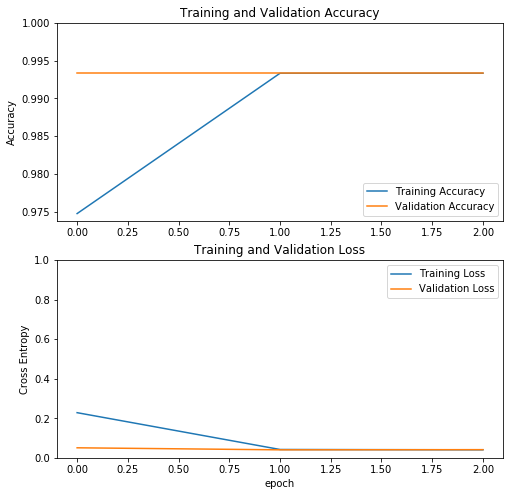

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [25]:
model.evaluate(test_batches)

150/150 [==============================] - 126s 842ms/step - loss: 0.0412 - acc: 0.9933


[0.04120865143835545, 0.9933342]